In [1]:
import train as train
import generate
import eval
from modules.config import read_config
import modules.plots as plots
import torch
import numpy as np
import os

In [2]:
BASE_DIR = "./tests/pipeline-test"
PROFILE = "prodlin-(10,20)-adam"

In [3]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

In [4]:
config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]

In [5]:
GENERATE = True
TRAIN = True
EVAL = True

IS_ONE_DIM = False

====== Generating profile product-linear-noise-20k ======


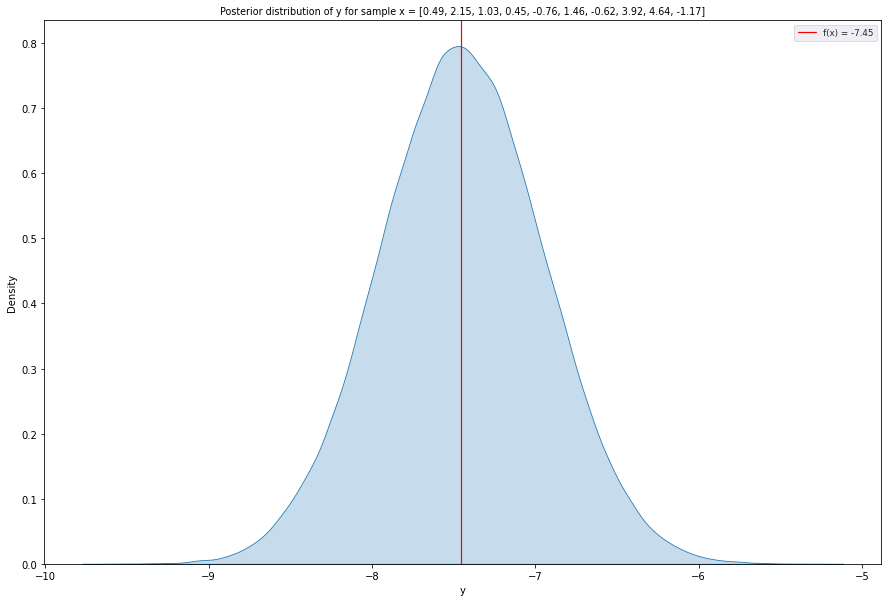

In [6]:
if GENERATE:
    if not os.path.exists(f"{BASE_DIR}/datasets"):
                os.mkdir(f"{BASE_DIR}/datasets")
    generate.gen(dataset_config, f"{BASE_DIR}/datasets")

In [7]:
if TRAIN:
    if not os.path.exists(f"{BASE_DIR}/models"):
        os.mkdir(f"{BASE_DIR}/models")

    train.train(config, dataset_config, f"{BASE_DIR}")

Using device: cpu
===== Training profile prodlin-(10,20)-adam =====


Epoch:   0%|          | 0/500 [00:00<?, ?it/s]

Loaded model and parameters from ./tests/pipeline-test/models/prodlin-(10,20)-adam
using device: cpu
====== evaluating profile prodlin-(10,20)-adam ======


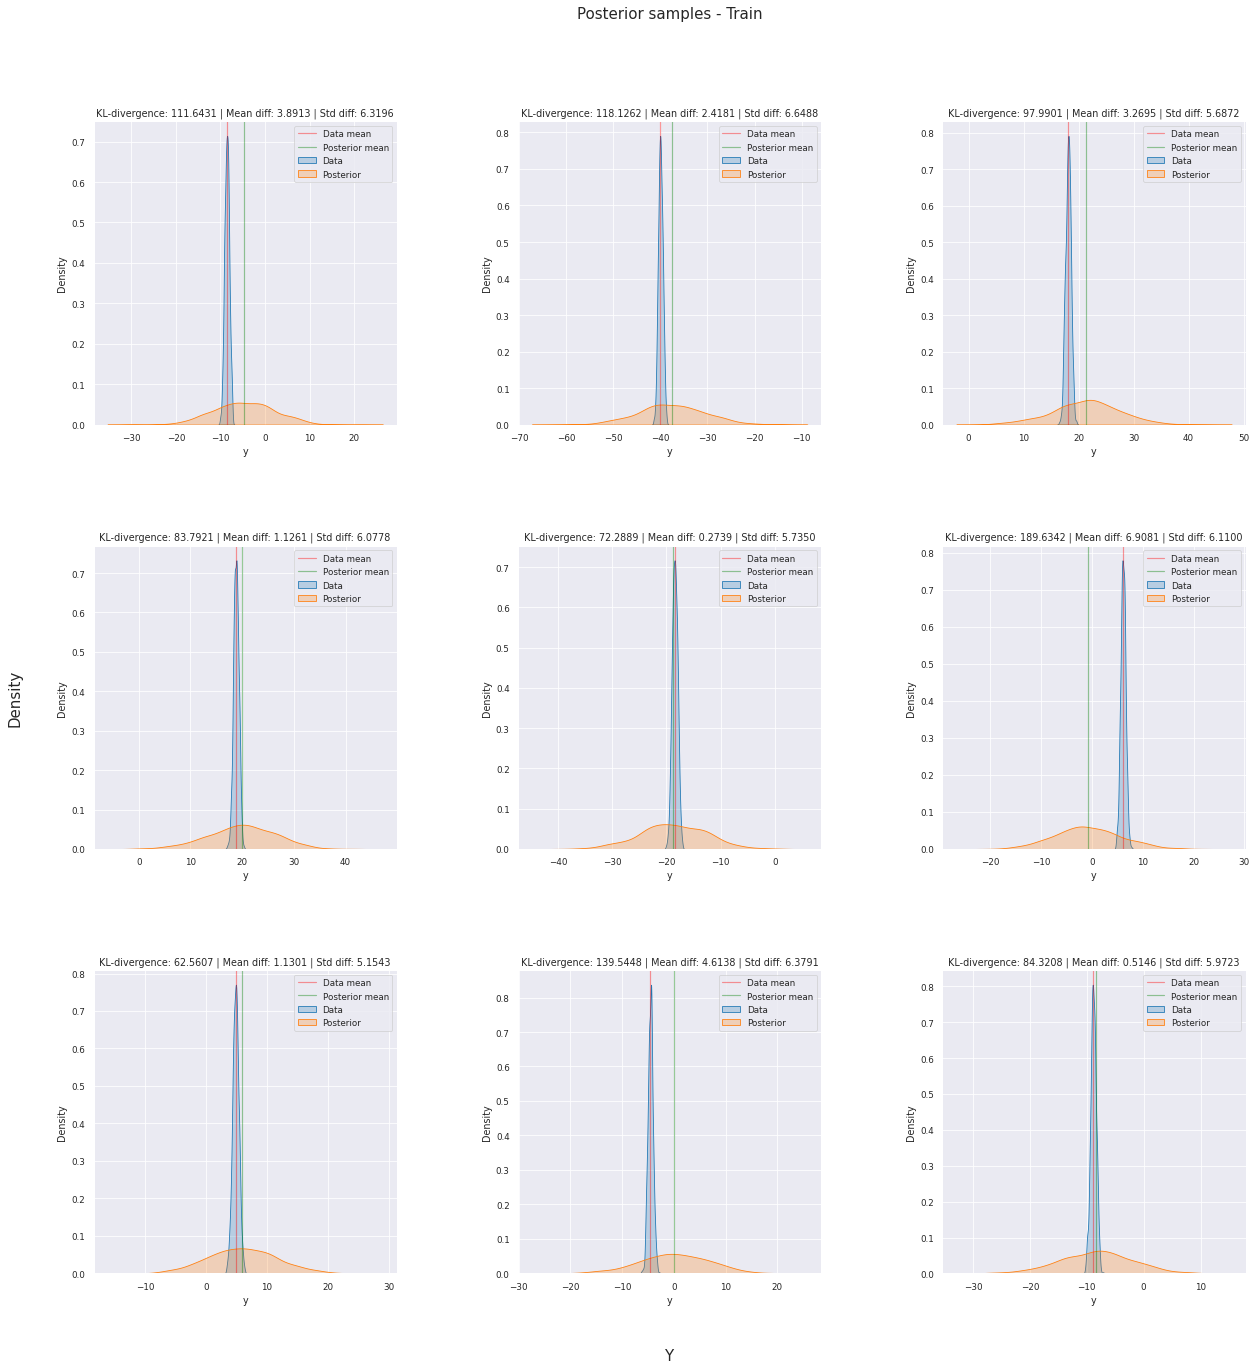

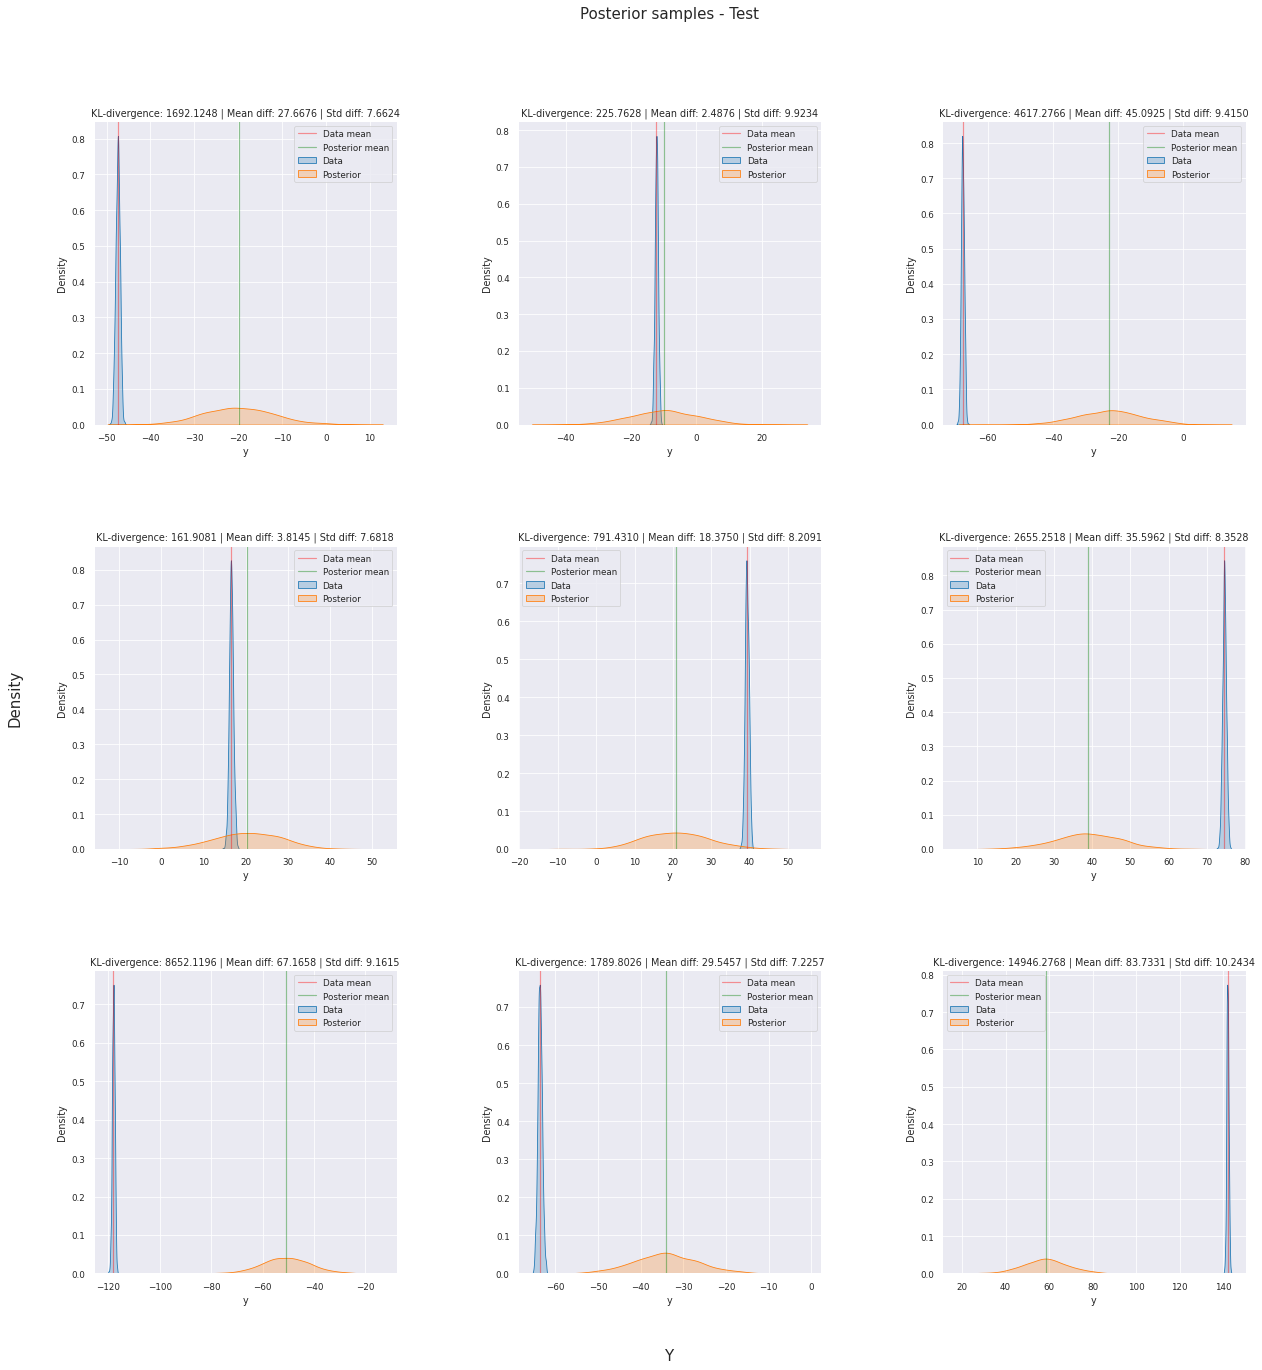

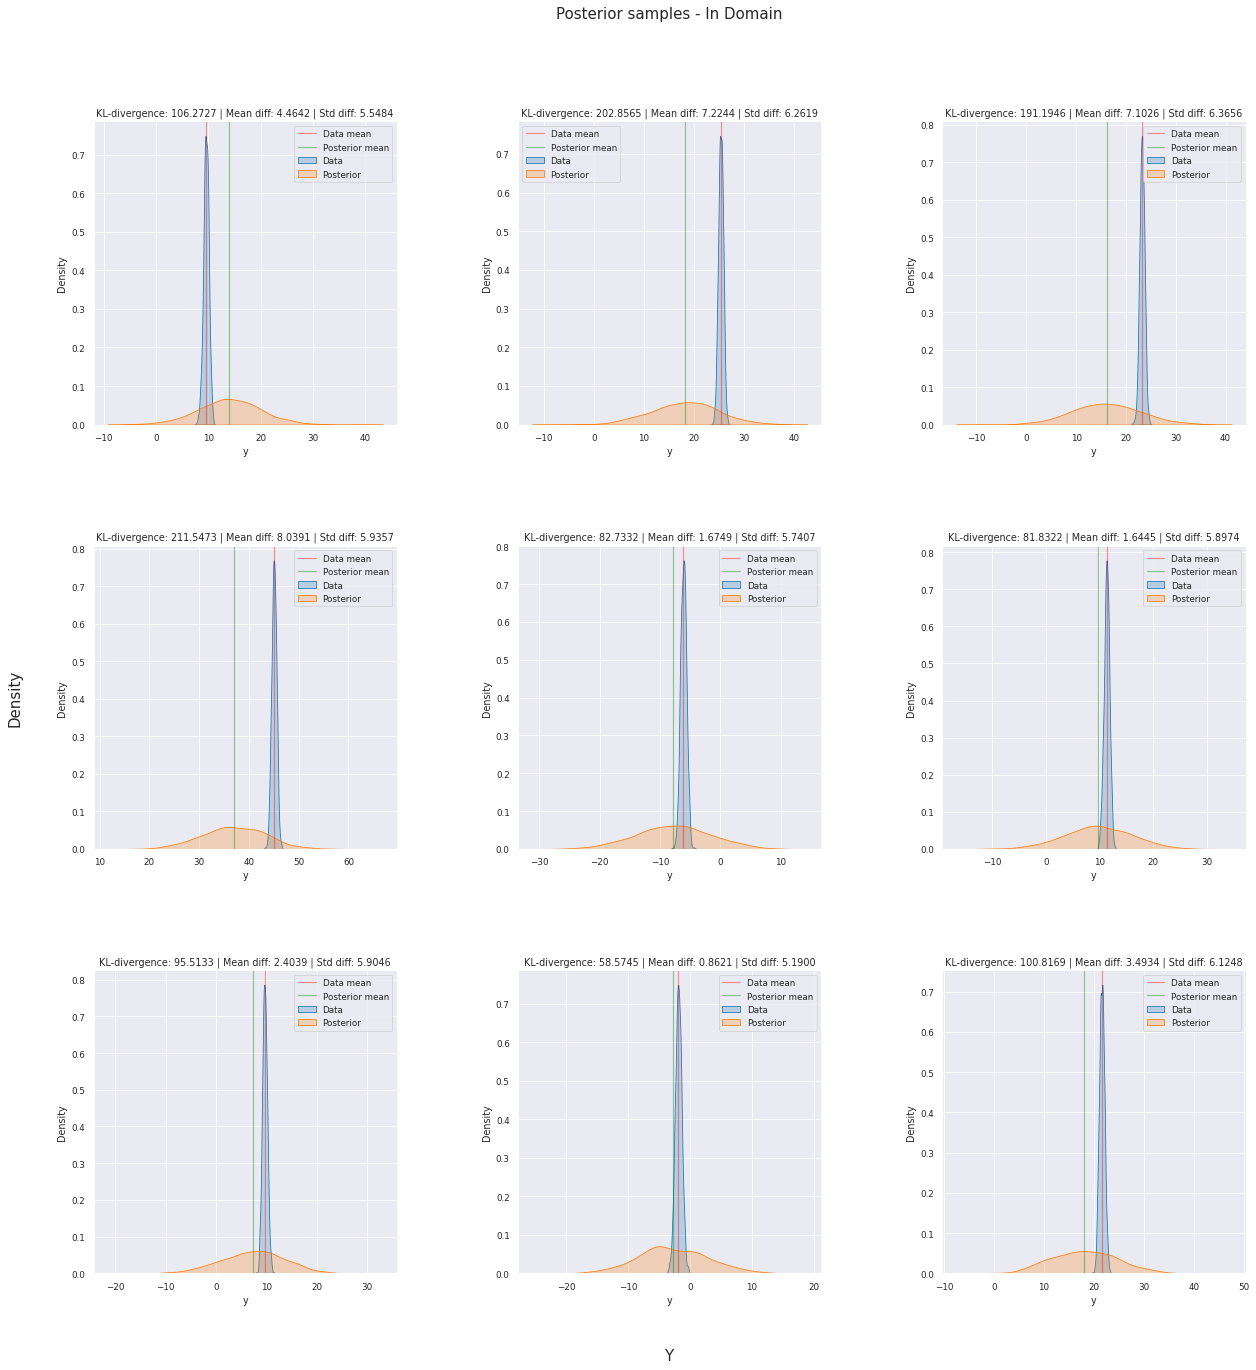

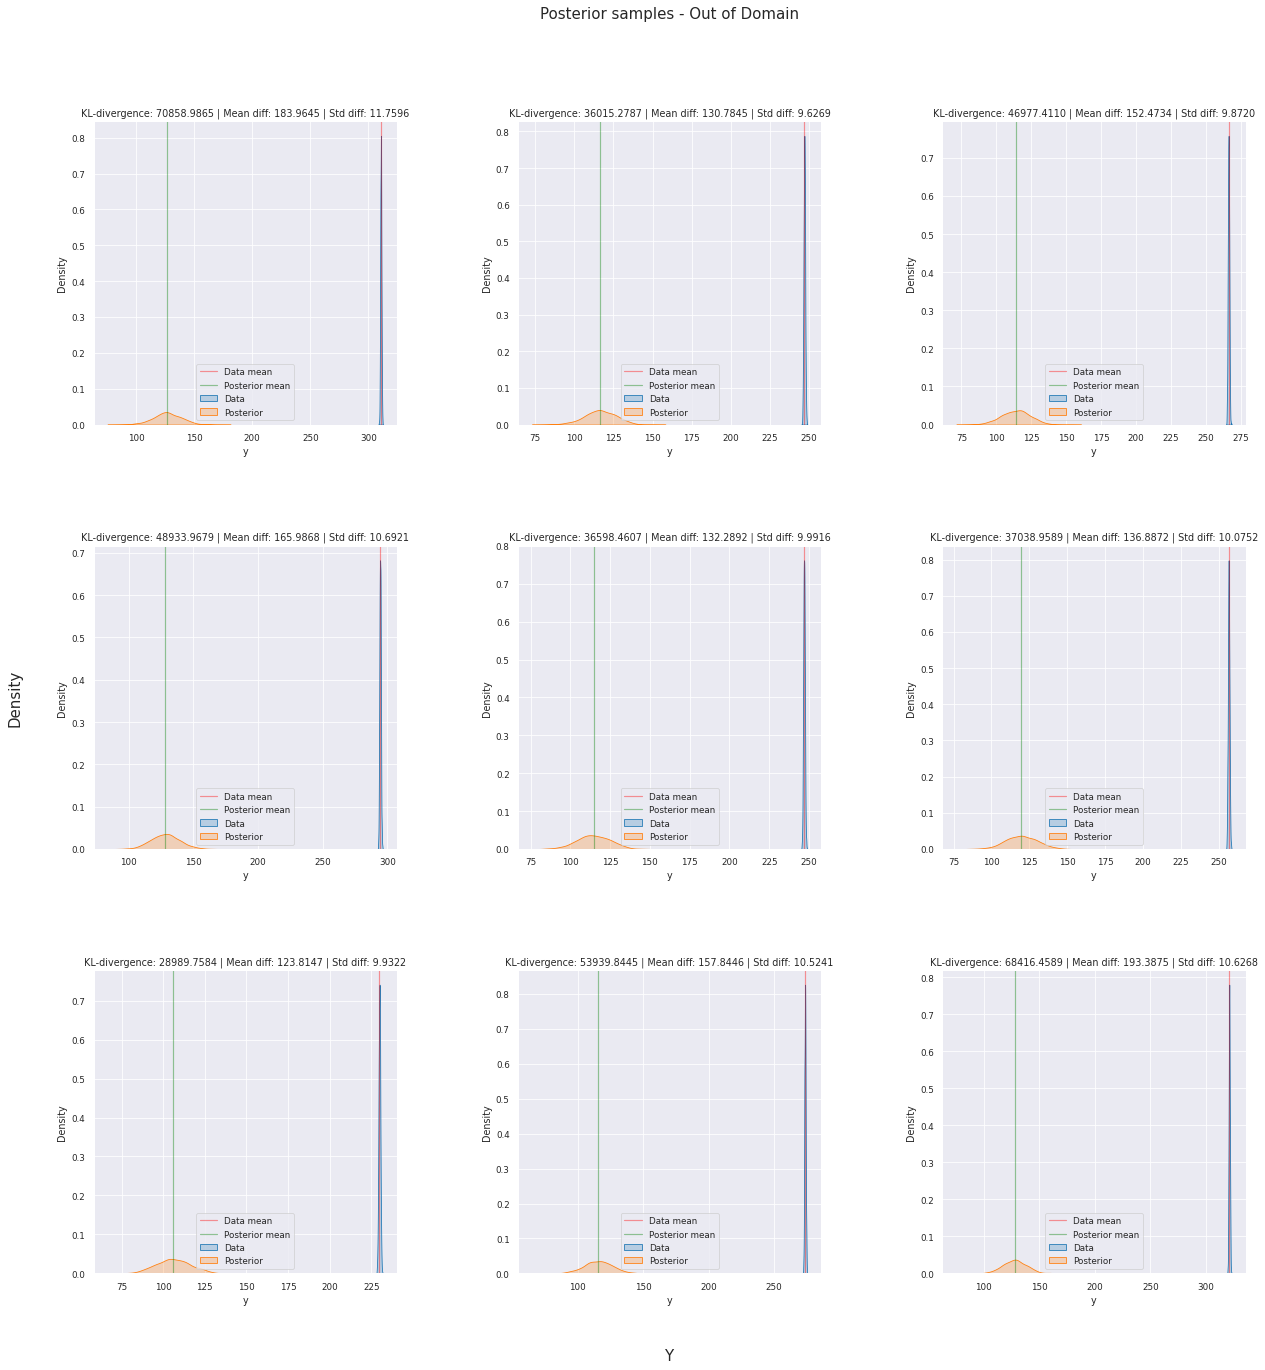

Eval done in 0:00:26.543962


In [ ]:
if EVAL:
    if not os.path.exists(f"{BASE_DIR}/results"):
                os.mkdir(f"{BASE_DIR}/results")
                
    eval.eval(config, dataset_config, f"{BASE_DIR}")